In [1]:
import os
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

In [2]:
kingfa_datasets_path = "./kingfadatasets/"

In [3]:
def wpt1D(data, wavelet='db1', mode='symmetric', maxlevel=4):
    wp = pywt.WaveletPacket(data=data[1750:2261], wavelet=wavelet, mode=mode, maxlevel=maxlevel)
    paths = [node.path for node in wp.get_level(4)]  # 列出所有树节点路径
    df_wpt = pd.DataFrame()  # 合并所有四级子节点
    for a in paths:
        df_wpt[a] = wp[a].data
    return df_wpt.values

In [4]:
X = np.array(pd.read_csv(kingfa_datasets_path+"data.csv", index_col=0))

In [5]:
X = np.apply_along_axis(wpt1D, 1, X)

In [7]:
y = np.array(pd.read_csv(kingfa_datasets_path+"target.csv", index_col=0))

In [8]:
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1024)

In [10]:
X_train = X_train.reshape(-1, 32, 16, 1)
X_test = X_test.reshape(-1, 32, 16, 1)
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [11]:
print(X_train.shape)
print(y_train.shape)

(2550, 32, 16, 1)
(2550, 3)


In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(filters=16, activation='sigmoid', kernel_size=(7, 5), input_shape=(32, 16, 1)))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

In [14]:
model.add(Conv2D(filters=32, activation='sigmoid',kernel_size=(5, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

In [15]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 12, 16)        576       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 6, 16)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 6, 32)         7712      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 672)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                43072     
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
__________

In [17]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_split=0.1)

Train on 2295 samples, validate on 255 samples
Epoch 1/1000
2295/2295 [==============================] - 1s 609us/step - loss: 1.0856 - acc: 0.4218 - val_loss: 0.7688 - val_acc: 0.6510
Epoch 2/1000
2295/2295 [==============================] - 1s 342us/step - loss: 0.5968 - acc: 0.6667 - val_loss: 0.4872 - val_acc: 0.6824
Epoch 3/1000
2295/2295 [==============================] - 1s 338us/step - loss: 0.4878 - acc: 0.6993 - val_loss: 0.4590 - val_acc: 0.7412
Epoch 4/1000
2295/2295 [==============================] - 1s 336us/step - loss: 0.4409 - acc: 0.7512 - val_loss: 0.4300 - val_acc: 0.7490
Epoch 5/1000
2295/2295 [==============================] - 1s 342us/step - loss: 0.4050 - acc: 0.7830 - val_loss: 0.3783 - val_acc: 0.8431
Epoch 6/1000
2295/2295 [==============================] - 1s 362us/step - loss: 0.3727 - acc: 0.8096 - val_loss: 0.3343 - val_acc: 0.8588
Epoch 7/1000
2295/2295 [==============================] - 1s 362us/step - loss: 0.3378 - acc: 0.8309 - val_loss: 0.4248 - val

2295/2295 [==============================] - 1s 328us/step - loss: 0.0128 - acc: 0.9956 - val_loss: 0.0309 - val_acc: 0.9882
Epoch 60/1000
2295/2295 [==============================] - 1s 325us/step - loss: 0.0106 - acc: 0.9969 - val_loss: 0.0243 - val_acc: 0.9922
Epoch 61/1000
2295/2295 [==============================] - 1s 323us/step - loss: 0.0150 - acc: 0.9943 - val_loss: 0.0098 - val_acc: 0.9961
Epoch 62/1000
2295/2295 [==============================] - 1s 326us/step - loss: 0.0115 - acc: 0.9961 - val_loss: 0.0367 - val_acc: 0.9882
Epoch 63/1000
2295/2295 [==============================] - 1s 322us/step - loss: 0.0226 - acc: 0.9935 - val_loss: 0.0163 - val_acc: 0.9961
Epoch 64/1000
2295/2295 [==============================] - 1s 328us/step - loss: 0.0166 - acc: 0.9956 - val_loss: 0.0471 - val_acc: 0.9882
Epoch 65/1000
2295/2295 [==============================] - 1s 326us/step - loss: 0.0106 - acc: 0.9965 - val_loss: 0.0162 - val_acc: 0.9961
Epoch 66/1000
2295/2295 [================

2295/2295 [==============================] - 1s 340us/step - loss: 0.0064 - acc: 0.9983 - val_loss: 0.0088 - val_acc: 0.9961
Epoch 118/1000
2295/2295 [==============================] - 1s 340us/step - loss: 0.0043 - acc: 0.9978 - val_loss: 0.0135 - val_acc: 0.9961
Epoch 119/1000
2295/2295 [==============================] - 1s 335us/step - loss: 0.0104 - acc: 0.9974 - val_loss: 0.0420 - val_acc: 0.9922
Epoch 120/1000
2295/2295 [==============================] - 1s 332us/step - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0126 - val_acc: 0.9961
Epoch 121/1000
2295/2295 [==============================] - 1s 331us/step - loss: 0.0075 - acc: 0.9969 - val_loss: 0.0104 - val_acc: 0.9961
Epoch 122/1000
2295/2295 [==============================] - 1s 336us/step - loss: 0.0041 - acc: 0.9983 - val_loss: 0.0052 - val_acc: 0.9961
Epoch 123/1000
2295/2295 [==============================] - 1s 324us/step - loss: 5.4931e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9961
Epoch 124/1000
2295/2295 [=====

2295/2295 [==============================] - 1s 351us/step - loss: 0.0031 - acc: 0.9987 - val_loss: 0.0065 - val_acc: 0.9961
Epoch 176/1000
2295/2295 [==============================] - 1s 348us/step - loss: 0.0064 - acc: 0.9978 - val_loss: 0.0168 - val_acc: 0.9961
Epoch 177/1000
2295/2295 [==============================] - 1s 348us/step - loss: 0.0023 - acc: 0.9991 - val_loss: 0.0494 - val_acc: 0.9922
Epoch 178/1000
2295/2295 [==============================] - 1s 347us/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0120 - val_acc: 0.9961
Epoch 179/1000
2295/2295 [==============================] - 1s 341us/step - loss: 0.0059 - acc: 0.9983 - val_loss: 0.0128 - val_acc: 0.9961
Epoch 180/1000
2295/2295 [==============================] - 1s 342us/step - loss: 0.0025 - acc: 0.9987 - val_loss: 0.0289 - val_acc: 0.9961
Epoch 181/1000
2295/2295 [==============================] - 1s 341us/step - loss: 4.3484e-04 - acc: 1.0000 - val_loss: 0.0147 - val_acc: 0.9961
Epoch 182/1000
2295/2295 [=====

Epoch 233/1000
2295/2295 [==============================] - 1s 355us/step - loss: 0.0022 - acc: 0.9987 - val_loss: 0.0273 - val_acc: 0.9961
Epoch 234/1000
2295/2295 [==============================] - 1s 356us/step - loss: 9.8647e-04 - acc: 0.9991 - val_loss: 0.0195 - val_acc: 0.9961
Epoch 235/1000
2295/2295 [==============================] - 1s 354us/step - loss: 3.3194e-04 - acc: 1.0000 - val_loss: 0.0180 - val_acc: 0.9961
Epoch 236/1000
2295/2295 [==============================] - 1s 353us/step - loss: 0.0030 - acc: 0.9996 - val_loss: 0.0035 - val_acc: 0.9961
Epoch 237/1000
2295/2295 [==============================] - 1s 354us/step - loss: 0.0037 - acc: 0.9991 - val_loss: 0.0197 - val_acc: 0.9961
Epoch 238/1000
2295/2295 [==============================] - 1s 353us/step - loss: 0.0041 - acc: 0.9987 - val_loss: 0.0202 - val_acc: 0.9961
Epoch 239/1000
2295/2295 [==============================] - 1s 347us/step - loss: 3.8291e-05 - acc: 1.0000 - val_loss: 0.1513 - val_acc: 0.9804
Epoch 24

2295/2295 [==============================] - 1s 311us/step - loss: 0.0012 - acc: 0.9996 - val_loss: 0.0121 - val_acc: 0.9961
Epoch 291/1000
2295/2295 [==============================] - 1s 310us/step - loss: 4.9594e-05 - acc: 1.0000 - val_loss: 0.0241 - val_acc: 0.9961
Epoch 292/1000
2295/2295 [==============================] - 1s 309us/step - loss: 0.0021 - acc: 0.9996 - val_loss: 0.0479 - val_acc: 0.9922
Epoch 293/1000
2295/2295 [==============================] - 1s 314us/step - loss: 0.0017 - acc: 0.9991 - val_loss: 0.0216 - val_acc: 0.9961
Epoch 294/1000
2295/2295 [==============================] - 1s 309us/step - loss: 0.0035 - acc: 0.9996 - val_loss: 0.0132 - val_acc: 0.9961
Epoch 295/1000
2295/2295 [==============================] - 1s 309us/step - loss: 1.2020e-04 - acc: 1.0000 - val_loss: 0.0633 - val_acc: 0.9922
Epoch 296/1000
2295/2295 [==============================] - 1s 310us/step - loss: 0.0055 - acc: 0.9991 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 297/1000
2295/2295 [=

Epoch 348/1000
2295/2295 [==============================] - 1s 323us/step - loss: 0.0046 - acc: 0.9996 - val_loss: 0.0227 - val_acc: 0.9961
Epoch 349/1000
2295/2295 [==============================] - 1s 325us/step - loss: 9.0733e-07 - acc: 1.0000 - val_loss: 0.0202 - val_acc: 0.9961
Epoch 350/1000
2295/2295 [==============================] - 1s 322us/step - loss: 0.0010 - acc: 0.9996 - val_loss: 0.0086 - val_acc: 0.9961
Epoch 351/1000
2295/2295 [==============================] - 1s 322us/step - loss: 1.0506e-05 - acc: 1.0000 - val_loss: 0.0212 - val_acc: 0.9961
Epoch 352/1000
2295/2295 [==============================] - 1s 322us/step - loss: 1.7223e-06 - acc: 1.0000 - val_loss: 0.0366 - val_acc: 0.9961
Epoch 353/1000
2295/2295 [==============================] - 1s 323us/step - loss: 0.0085 - acc: 0.9987 - val_loss: 0.0676 - val_acc: 0.9922
Epoch 354/1000
2295/2295 [==============================] - 1s 322us/step - loss: 8.6009e-05 - acc: 1.0000 - val_loss: 0.0813 - val_acc: 0.9922
Epoc

2295/2295 [==============================] - 1s 324us/step - loss: 0.0029 - acc: 0.9996 - val_loss: 0.0046 - val_acc: 0.9961
Epoch 406/1000
2295/2295 [==============================] - 1s 322us/step - loss: 2.0303e-06 - acc: 1.0000 - val_loss: 0.0238 - val_acc: 0.9961
Epoch 407/1000
2295/2295 [==============================] - 1s 322us/step - loss: 0.0019 - acc: 0.9996 - val_loss: 0.0217 - val_acc: 0.9961
Epoch 408/1000
2295/2295 [==============================] - 1s 322us/step - loss: 4.0422e-07 - acc: 1.0000 - val_loss: 0.0221 - val_acc: 0.9961
Epoch 409/1000
2295/2295 [==============================] - 1s 323us/step - loss: 0.0026 - acc: 0.9996 - val_loss: 0.0044 - val_acc: 0.9961
Epoch 410/1000
2295/2295 [==============================] - 1s 325us/step - loss: 9.7642e-06 - acc: 1.0000 - val_loss: 0.0145 - val_acc: 0.9961
Epoch 411/1000
2295/2295 [==============================] - 1s 323us/step - loss: 1.7904e-05 - acc: 1.0000 - val_loss: 0.0111 - val_acc: 0.9961
Epoch 412/1000
2295

2295/2295 [==============================] - 1s 322us/step - loss: 2.9255e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 463/1000
2295/2295 [==============================] - 1s 322us/step - loss: 8.3695e-04 - acc: 0.9996 - val_loss: 0.0177 - val_acc: 0.9961
Epoch 464/1000
2295/2295 [==============================] - 1s 328us/step - loss: 6.1838e-06 - acc: 1.0000 - val_loss: 0.0304 - val_acc: 0.9961
Epoch 465/1000
2295/2295 [==============================] - 1s 323us/step - loss: 4.3089e-04 - acc: 0.9996 - val_loss: 0.0789 - val_acc: 0.9922
Epoch 466/1000
2295/2295 [==============================] - 1s 321us/step - loss: 2.0572e-05 - acc: 1.0000 - val_loss: 0.0350 - val_acc: 0.9922
Epoch 467/1000
2295/2295 [==============================] - 1s 322us/step - loss: 8.8323e-07 - acc: 1.0000 - val_loss: 0.0387 - val_acc: 0.9922
Epoch 468/1000
2295/2295 [==============================] - 1s 322us/step - loss: 3.2266e-04 - acc: 0.9996 - val_loss: 0.0343 - val_acc: 0.9922
Epoch 4

2295/2295 [==============================] - 1s 322us/step - loss: 2.1792e-06 - acc: 1.0000 - val_loss: 0.0294 - val_acc: 0.9922
Epoch 520/1000
2295/2295 [==============================] - 1s 322us/step - loss: 2.2514e-06 - acc: 1.0000 - val_loss: 0.0551 - val_acc: 0.9922
Epoch 521/1000
2295/2295 [==============================] - 1s 321us/step - loss: 1.4176e-05 - acc: 1.0000 - val_loss: 0.0280 - val_acc: 0.9961
Epoch 522/1000
2295/2295 [==============================] - 1s 323us/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0261 - val_acc: 0.9961
Epoch 523/1000
2295/2295 [==============================] - 1s 321us/step - loss: 1.0464e-06 - acc: 1.0000 - val_loss: 0.0269 - val_acc: 0.9961
Epoch 524/1000
2295/2295 [==============================] - 1s 325us/step - loss: 9.9915e-06 - acc: 1.0000 - val_loss: 0.0342 - val_acc: 0.9961
Epoch 525/1000
2295/2295 [==============================] - 1s 322us/step - loss: 1.5497e-05 - acc: 1.0000 - val_loss: 0.0224 - val_acc: 0.9961
Epoch 526/1

2295/2295 [==============================] - 1s 322us/step - loss: 2.0148e-05 - acc: 1.0000 - val_loss: 0.0318 - val_acc: 0.9922
Epoch 577/1000
2295/2295 [==============================] - 1s 322us/step - loss: 7.8973e-07 - acc: 1.0000 - val_loss: 0.0313 - val_acc: 0.9922
Epoch 578/1000
2295/2295 [==============================] - 1s 326us/step - loss: 0.0035 - acc: 0.9996 - val_loss: 0.0735 - val_acc: 0.9922
Epoch 579/1000
2295/2295 [==============================] - 1s 321us/step - loss: 3.7850e-05 - acc: 1.0000 - val_loss: 0.0775 - val_acc: 0.9922
Epoch 580/1000
2295/2295 [==============================] - 1s 322us/step - loss: 2.3168e-04 - acc: 1.0000 - val_loss: 0.0770 - val_acc: 0.9922
Epoch 581/1000
2295/2295 [==============================] - 1s 322us/step - loss: 1.1652e-05 - acc: 1.0000 - val_loss: 0.0159 - val_acc: 0.9961
Epoch 582/1000
2295/2295 [==============================] - 1s 324us/step - loss: 0.0029 - acc: 0.9996 - val_loss: 0.0038 - val_acc: 0.9961
Epoch 583/1000


2295/2295 [==============================] - 1s 324us/step - loss: 0.0021 - acc: 0.9996 - val_loss: 0.0160 - val_acc: 0.9961
Epoch 634/1000
2295/2295 [==============================] - 1s 322us/step - loss: 1.3871e-06 - acc: 1.0000 - val_loss: 0.0183 - val_acc: 0.9961
Epoch 635/1000
2295/2295 [==============================] - 1s 322us/step - loss: 5.4757e-07 - acc: 1.0000 - val_loss: 0.0229 - val_acc: 0.9961
Epoch 636/1000
2295/2295 [==============================] - 1s 322us/step - loss: 2.1455e-07 - acc: 1.0000 - val_loss: 0.0174 - val_acc: 0.9961
Epoch 637/1000
2295/2295 [==============================] - 1s 322us/step - loss: 0.0023 - acc: 0.9996 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 638/1000
2295/2295 [==============================] - 1s 322us/step - loss: 4.0739e-07 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 0.9961
Epoch 639/1000
2295/2295 [==============================] - 1s 332us/step - loss: 1.3817e-04 - acc: 1.0000 - val_loss: 0.0726 - val_acc: 0.9922
Epoch 640/1000


Epoch 690/1000
2295/2295 [==============================] - 1s 337us/step - loss: 0.0033 - acc: 0.9996 - val_loss: 1.3865e-04 - val_acc: 1.0000
Epoch 691/1000
2295/2295 [==============================] - 1s 358us/step - loss: 8.4677e-06 - acc: 1.0000 - val_loss: 0.0587 - val_acc: 0.9922
Epoch 692/1000
2295/2295 [==============================] - 1s 345us/step - loss: 2.1312e-05 - acc: 1.0000 - val_loss: 0.0606 - val_acc: 0.9922
Epoch 693/1000
2295/2295 [==============================] - 1s 344us/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0263 - val_acc: 0.9961
Epoch 694/1000
2295/2295 [==============================] - 1s 361us/step - loss: 5.4265e-05 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 695/1000
2295/2295 [==============================] - 1s 346us/step - loss: 0.0033 - acc: 0.9991 - val_loss: 0.0115 - val_acc: 0.9961
Epoch 696/1000
2295/2295 [==============================] - 1s 364us/step - loss: 3.1200e-05 - acc: 1.0000 - val_loss: 0.0082 - val_acc: 0.9961


Epoch 747/1000
2295/2295 [==============================] - 1s 309us/step - loss: 1.0650e-05 - acc: 1.0000 - val_loss: 0.0591 - val_acc: 0.9922
Epoch 748/1000
2295/2295 [==============================] - 1s 309us/step - loss: 0.0049 - acc: 0.9991 - val_loss: 0.0137 - val_acc: 0.9961
Epoch 749/1000
2295/2295 [==============================] - 1s 308us/step - loss: 2.0544e-06 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 0.9961
Epoch 750/1000
2295/2295 [==============================] - 1s 309us/step - loss: 1.4118e-07 - acc: 1.0000 - val_loss: 0.0075 - val_acc: 0.9961
Epoch 751/1000
2295/2295 [==============================] - 1s 307us/step - loss: 0.0082 - acc: 0.9991 - val_loss: 3.6029e-04 - val_acc: 1.0000
Epoch 752/1000
2295/2295 [==============================] - 1s 313us/step - loss: 8.7669e-07 - acc: 1.0000 - val_loss: 0.0071 - val_acc: 0.9961
Epoch 753/1000
2295/2295 [==============================] - 1s 307us/step - loss: 0.0044 - acc: 0.9996 - val_loss: 0.0841 - val_acc: 0.9922


Epoch 804/1000
2295/2295 [==============================] - 1s 341us/step - loss: 2.2778e-05 - acc: 1.0000 - val_loss: 0.0299 - val_acc: 0.9922
Epoch 805/1000
2295/2295 [==============================] - 1s 352us/step - loss: 2.9157e-07 - acc: 1.0000 - val_loss: 0.0268 - val_acc: 0.9922
Epoch 806/1000
2295/2295 [==============================] - 1s 341us/step - loss: 6.8027e-04 - acc: 0.9996 - val_loss: 0.0108 - val_acc: 0.9961
Epoch 807/1000
2295/2295 [==============================] - 1s 334us/step - loss: 3.8340e-07 - acc: 1.0000 - val_loss: 0.0769 - val_acc: 0.9922
Epoch 808/1000
2295/2295 [==============================] - 1s 332us/step - loss: 0.0019 - acc: 0.9996 - val_loss: 0.0091 - val_acc: 0.9961
Epoch 809/1000
2295/2295 [==============================] - 1s 334us/step - loss: 4.5664e-07 - acc: 1.0000 - val_loss: 0.0092 - val_acc: 0.9961
Epoch 810/1000
2295/2295 [==============================] - 1s 334us/step - loss: 1.5760e-07 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.9

2295/2295 [==============================] - 1s 346us/step - loss: 1.5199e-06 - acc: 1.0000 - val_loss: 0.0683 - val_acc: 0.9922
Epoch 862/1000
2295/2295 [==============================] - 1s 344us/step - loss: 8.4572e-07 - acc: 1.0000 - val_loss: 0.0496 - val_acc: 0.9922
Epoch 863/1000
2295/2295 [==============================] - 1s 349us/step - loss: 2.0576e-04 - acc: 1.0000 - val_loss: 0.0571 - val_acc: 0.9922
Epoch 864/1000
2295/2295 [==============================] - 1s 347us/step - loss: 7.5272e-07 - acc: 1.0000 - val_loss: 0.0619 - val_acc: 0.9922
Epoch 865/1000
2295/2295 [==============================] - 1s 348us/step - loss: 0.0020 - acc: 0.9996 - val_loss: 0.0177 - val_acc: 0.9961
Epoch 866/1000
2295/2295 [==============================] - 1s 347us/step - loss: 8.1839e-05 - acc: 1.0000 - val_loss: 0.0699 - val_acc: 0.9922
Epoch 867/1000
2295/2295 [==============================] - 1s 351us/step - loss: 5.1002e-07 - acc: 1.0000 - val_loss: 0.0259 - val_acc: 0.9961
Epoch 868/1

Epoch 918/1000
2295/2295 [==============================] - 1s 339us/step - loss: 7.0851e-07 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 0.9961
Epoch 919/1000
2295/2295 [==============================] - 1s 335us/step - loss: 0.0089 - acc: 0.9991 - val_loss: 0.0030 - val_acc: 0.9961
Epoch 920/1000
2295/2295 [==============================] - 1s 336us/step - loss: 1.3241e-06 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9961
Epoch 921/1000
2295/2295 [==============================] - 1s 335us/step - loss: 2.1443e-07 - acc: 1.0000 - val_loss: 6.0184e-04 - val_acc: 1.0000
Epoch 922/1000
2295/2295 [==============================] - 1s 335us/step - loss: 0.0012 - acc: 0.9996 - val_loss: 0.0620 - val_acc: 0.9922
Epoch 923/1000
2295/2295 [==============================] - 1s 335us/step - loss: 3.3022e-06 - acc: 1.0000 - val_loss: 0.0389 - val_acc: 0.9922
Epoch 924/1000
2295/2295 [==============================] - 1s 339us/step - loss: 3.0195e-07 - acc: 1.0000 - val_loss: 0.0239 - val_acc: 0.9

Epoch 975/1000
2295/2295 [==============================] - 1s 346us/step - loss: 5.5126e-05 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 976/1000
2295/2295 [==============================] - 1s 342us/step - loss: 2.8525e-04 - acc: 1.0000 - val_loss: 0.0086 - val_acc: 0.9961
Epoch 977/1000
2295/2295 [==============================] - 1s 343us/step - loss: 1.5848e-06 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 978/1000
2295/2295 [==============================] - 1s 343us/step - loss: 3.5259e-05 - acc: 1.0000 - val_loss: 0.0156 - val_acc: 0.9961
Epoch 979/1000
2295/2295 [==============================] - 1s 344us/step - loss: 5.7674e-06 - acc: 1.0000 - val_loss: 0.0271 - val_acc: 0.9961
Epoch 980/1000
2295/2295 [==============================] - 1s 343us/step - loss: 3.3555e-07 - acc: 1.0000 - val_loss: 0.0451 - val_acc: 0.9922
Epoch 981/1000
2295/2295 [==============================] - 1s 349us/step - loss: 0.0011 - acc: 0.9996 - val_loss: 0.1040 - val_acc: 0.9

In [19]:
score = model.evaluate(X_test, y_test)
print("LOSS:", score[0])
print("Accuracy:", score[1])

450/450 [==============================] - 0s 178us/step
LOSS: 0.016511049045366235
Accuracy: 0.9977777777777778


In [20]:
predict = model.predict(X_test)

In [21]:
np.argmax(predict, axis=1)

array([0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 2, 1, 1,
       2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 2, 0, 1, 2,
       1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 1,
       2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2,
       2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1,
       0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0,

In [22]:
np.where(np.argmax(predict, axis=1) != np.argmax(y_test, axis=1))

(array([213], dtype=int64),)

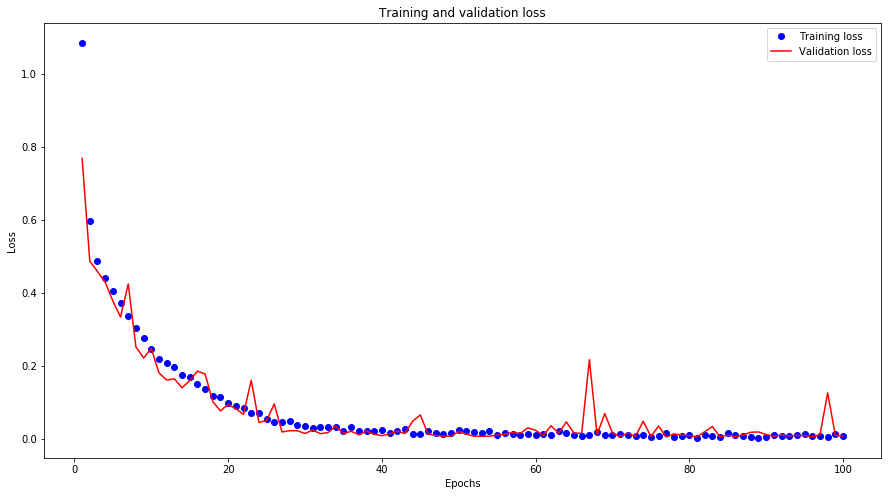

In [27]:
loss = history.history['loss'][:100]
val_loss = history.history['val_loss'][:100]
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(15,8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

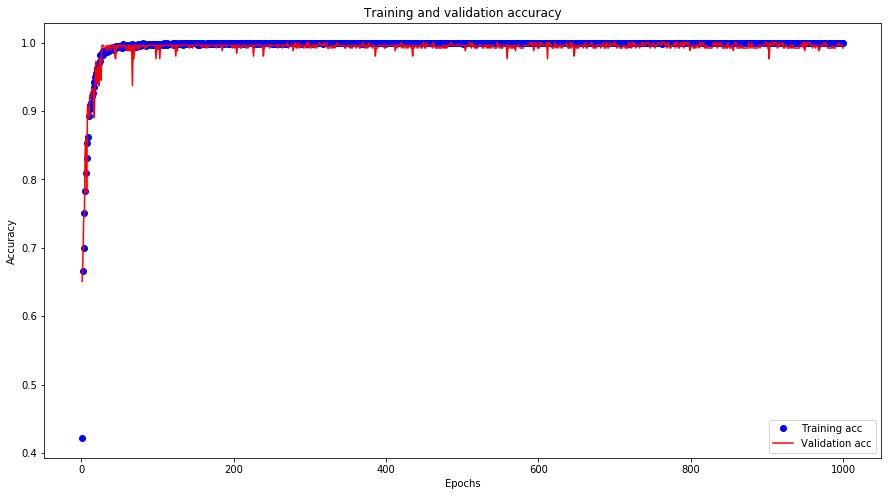

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.figure(figsize=(15,8))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()